In [1]:
# prompt: leer el archi csv

#from google.colab import drive
import pandas as pd
#drive.mount('/content/drive')


file_path = "C:/Users/Userr/Desktop/NoCountry/c19-124-n-data-bi/data/Data2.csv"

df = pd.read_csv(file_path)


In [4]:
df.head(5)

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Time,LimiteCredito,...,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid),Dia_Semana_Domingo,Dia_Semana_Jueves,Dia_Semana_Lunes,Dia_Semana_Martes,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes
0,11473,0,35563,72510,44317,727,1991,1,0.905811,33900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,13029,0,35563,72510,44317,727,1991,1,-0.445224,33900,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,5500,0,35563,72510,44317,727,1991,2,-1.142108,33900,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1167,0,35563,72510,44317,727,1991,2,-0.326885,33900,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,995,0,35563,72510,44317,727,1991,3,1.014288,33900,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898336 entries, 0 to 1898335
Data columns (total 32 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Amount                       int64  
 1   Is_Fraud                     int64  
 2   IngresoPerCapita             int64  
 3   IngresoAnual                 int64  
 4   DebitoTotal                  int64  
 5   FICO_Score                   int64  
 6   Year                         int64  
 7   Month                        int64  
 8   Time                         float64
 9   LimiteCredito                int64  
 10  Errors_Bad CVV               float64
 11  Errors_Bad Card Number       float64
 12  Errors_Bad Expiration        float64
 13  Errors_Bad PIN               float64
 14  Errors_Bad Zipcode           float64
 15  Errors_Insufficient Balance  float64
 16  Errors_SIN ERROR             float64
 17  Errors_Technical Glitch      float64
 18  BancoCredito_Amex            float64
 19  

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [6]:
# Cargar datos
X = df.drop('Is_Fraud', axis=1)
y = df['Is_Fraud']


In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [8]:
# Aplicar SMOTE para sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [9]:
# Calcular scale_pos_weight
# Calcula el ratio entre las clases para usarlo en scale_pos_weight
import numpy as np
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)


In [10]:
ratio

789.9732142857143

In [12]:
# Crear el modelo con scale_pos_weight

import xgboost as xgb
model = xgb.XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss')


In [13]:
#Entrenar el modelo

model.fit(X_train, y_train)

c:\Users\Userr\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [20:46:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [14]:
y_pred = model.predict(X_test)

In [15]:
# Evaluar el modelo
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[533505  35276]
 [   335    385]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    568781
           1       0.01      0.53      0.02       720

    accuracy                           0.94    569501
   macro avg       0.51      0.74      0.49    569501
weighted avg       1.00      0.94      0.97    569501



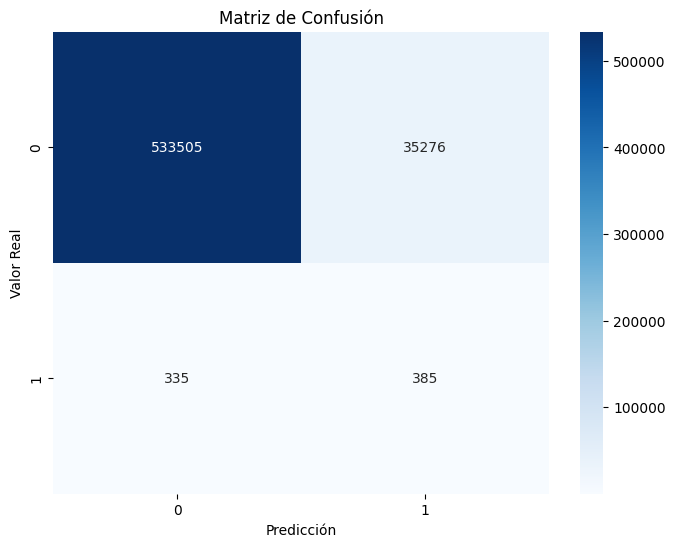

In [16]:


import matplotlib.pyplot as plt
import seaborn as sns

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()


In [17]:
# Identificando el procentual de error
from sklearn import metrics
from sklearn.metrics import mean_squared_error, roc_auc_score

error = mean_squared_error(y_test, y_pred)
print("Error porcentual : %f" % (error*100))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))

Error porcentual : 6.253018
AUC-ROC: 0.8584853958631607
Exactitud: 0.937469820070553


In [19]:
#poner a prueba el modelo clf


DatosPrueba = pd.read_csv("C:/Users/Userr/Desktop/NoCountry/c19-124-n-data-bi/data/DatosVerificacion.csv")

In [20]:
XPrueba = DatosPrueba.drop('Is_Fraud', axis=1)
yPrueba = DatosPrueba['Is_Fraud']

In [21]:
#El conjunto de datos para prueba tiene 10 transacciones, 5 fraudulentas y 5 que no lo son, DatosPrueba =[1,1,1,1,1,0,0,0,0,,0]
Prediccion = model.predict(XPrueba)

In [22]:
Prediccion

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1])

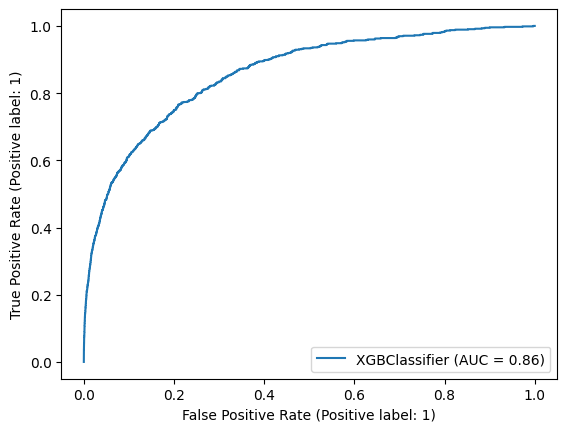

In [23]:
# graficamente como clasisfica el modelo

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()